In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.linear_model import lars_path
from sklearn.linear_model import LassoCV
from sklearn.linear_model import enet_path
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

In [49]:
X = np.random.uniform(low=-0.5, high=0.5, size=(30,23))

s = np.ones((30,1))

error = 0.00001#np.random.rand()
error_corr = 0.01 * error

group1 = np.ones((30,9))
group2 = np.ones((30,9))
group3 = np.ones((30,9))

for row in range(group1.shape[0]):
    for column in range(group1.shape[1]):
        group1[row][column] *= X[row][0]
        group1[row][column] += error_corr
        
for row in range(group2.shape[0]):
    for column in range(group2.shape[1]):
        group2[row][column] *= X[row][1]
        group2[row][column] += error_corr
        
for row in range(group3.shape[0]):
    for column in range(group3.shape[1]):
        group3[row][column] *= X[row][2]
        group3[row][column] += error_corr

print(group1.shape)
X_data = np.insert(X, [1], group1, axis=1)
X_data = np.insert(X_data, [11], group2, axis=1)
X_data = np.insert(X_data, [21], group3, axis=1)

print(X_data.shape)

beta = np.zeros((50,1))
beta[0] = 15
beta[10] = 15
beta[20] = 15
#beta[1] = beta[2] = beta[3] = beta[4] = beta[5] = beta[6] = beta[7] = beta[8] = beta[9] = 1
#beta[19] = beta[11] = beta[12] = beta[13] = beta[14] = beta[15] = beta[16] = beta[17] = beta[18] = 1
#beta[21] = beta[22] = beta[23] = beta[24] = beta[25] = beta[26] = beta[27] = beta[28] = beta[29] = 1


print(beta.shape)
print(X.shape)
y = np.sign((X_data.dot(beta)) + error)

(30, 9)
(30, 50)
(50, 1)
(30, 23)


In [50]:
df = pd.DataFrame(X_data)

dfy = pd.DataFrame(y)
#df3 = pd.concat([df,dfy], axis=1)
#df3.sample(10)

df['output'] = y
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,output
23,-0.405688,-0.405688,-0.405688,-0.405688,-0.405688,-0.405688,-0.405688,-0.405688,-0.405688,-0.405688,...,-0.387198,0.252323,-0.428288,0.415991,-0.351511,-0.188872,-0.122831,-0.130018,-0.220950,-1.0
29,-0.192555,-0.192555,-0.192555,-0.192555,-0.192555,-0.192555,-0.192555,-0.192555,-0.192555,-0.192555,...,-0.360473,0.429654,0.204234,-0.434659,-0.115198,0.242502,0.452558,0.476906,0.200570,-1.0
17,-0.128820,-0.128820,-0.128820,-0.128820,-0.128820,-0.128820,-0.128820,-0.128820,-0.128820,-0.128820,...,0.209732,0.114403,0.005502,0.241837,-0.001662,-0.141108,-0.060643,-0.170284,-0.029002,-1.0
12,-0.398822,-0.398822,-0.398822,-0.398822,-0.398822,-0.398822,-0.398822,-0.398822,-0.398822,-0.398822,...,0.122506,-0.172491,0.328938,-0.058323,0.156746,0.318999,-0.123064,-0.168370,0.484387,-1.0
10,-0.090004,-0.090004,-0.090004,-0.090004,-0.090004,-0.090004,-0.090004,-0.090004,-0.090004,-0.090004,...,-0.228805,0.228483,0.136713,-0.104898,-0.103062,-0.222132,-0.417448,0.002418,-0.342582,1.0
0,-0.252002,-0.252002,-0.252002,-0.252002,-0.252002,-0.252002,-0.252002,-0.252002,-0.252002,-0.252002,...,-0.470621,0.186729,0.028605,0.487423,-0.025349,-0.240103,-0.393672,-0.115811,-0.188249,-1.0
20,-0.117268,-0.117268,-0.117268,-0.117268,-0.117268,-0.117268,-0.117268,-0.117268,-0.117268,-0.117268,...,-0.458325,-0.356995,-0.396347,-0.398764,-0.106375,0.241891,0.323803,-0.184345,0.175654,1.0
3,-0.100896,-0.100896,-0.100896,-0.100896,-0.100896,-0.100896,-0.100896,-0.100896,-0.100896,-0.100896,...,0.203155,0.138433,-0.170947,-0.132605,-0.285395,-0.497830,0.455433,-0.112719,-0.291518,1.0
21,0.207162,0.207162,0.207162,0.207162,0.207162,0.207162,0.207162,0.207162,0.207162,0.207162,...,0.022775,0.467806,0.420638,-0.188193,0.391950,0.358457,0.409469,0.277360,0.160153,-1.0
9,0.006127,0.006127,0.006127,0.006127,0.006127,0.006127,0.006127,0.006127,0.006127,0.006127,...,0.029523,0.153826,0.073782,-0.214242,0.292977,-0.071929,-0.283741,0.136652,0.166108,1.0


In [51]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,output
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-0.101661,-0.101661,-0.101661,-0.101661,-0.101661,-0.101661,-0.101661,-0.101661,-0.101661,-0.101661,...,-0.083814,0.074422,-0.024891,0.002591,-0.004230,-0.011581,-0.045693,0.006580,0.010231,0.066667
std,0.258821,0.258821,0.258821,0.258821,0.258821,0.258821,0.258821,0.258821,0.258821,0.258821,...,0.285227,0.282076,0.287707,0.311443,0.257787,0.240613,0.299649,0.271920,0.287059,1.014833
min,-0.475083,-0.475083,-0.475083,-0.475083,-0.475083,-0.475083,-0.475083,-0.475083,-0.475083,-0.475083,...,-0.494088,-0.499278,-0.485716,-0.490498,-0.499970,-0.497830,-0.487760,-0.469191,-0.403108,-1.000000
25%,-0.263008,-0.263008,-0.263008,-0.263008,-0.263008,-0.263008,-0.263008,-0.263008,-0.263008,-0.263008,...,-0.376264,-0.100482,-0.220812,-0.252720,-0.112992,-0.182151,-0.309400,-0.169805,-0.239613,-1.000000
50%,-0.145955,-0.145955,-0.145955,-0.145955,-0.145955,-0.145955,-0.145955,-0.145955,-0.145955,-0.145955,...,-0.080012,0.146130,-0.013127,-0.059103,0.009756,-0.006184,-0.086506,-0.042447,-0.004820,1.000000
75%,0.060135,0.060135,0.060135,0.060135,0.060135,0.060135,0.060135,0.060135,0.060135,0.060135,...,0.169984,0.230765,0.187354,0.282570,0.175219,0.117242,0.177761,0.260568,0.232907,1.000000
max,0.494273,0.494273,0.494273,0.494273,0.494273,0.494273,0.494273,0.494273,0.494273,0.494273,...,0.401615,0.489708,0.476707,0.487423,0.430864,0.366335,0.455433,0.490807,0.484387,1.000000


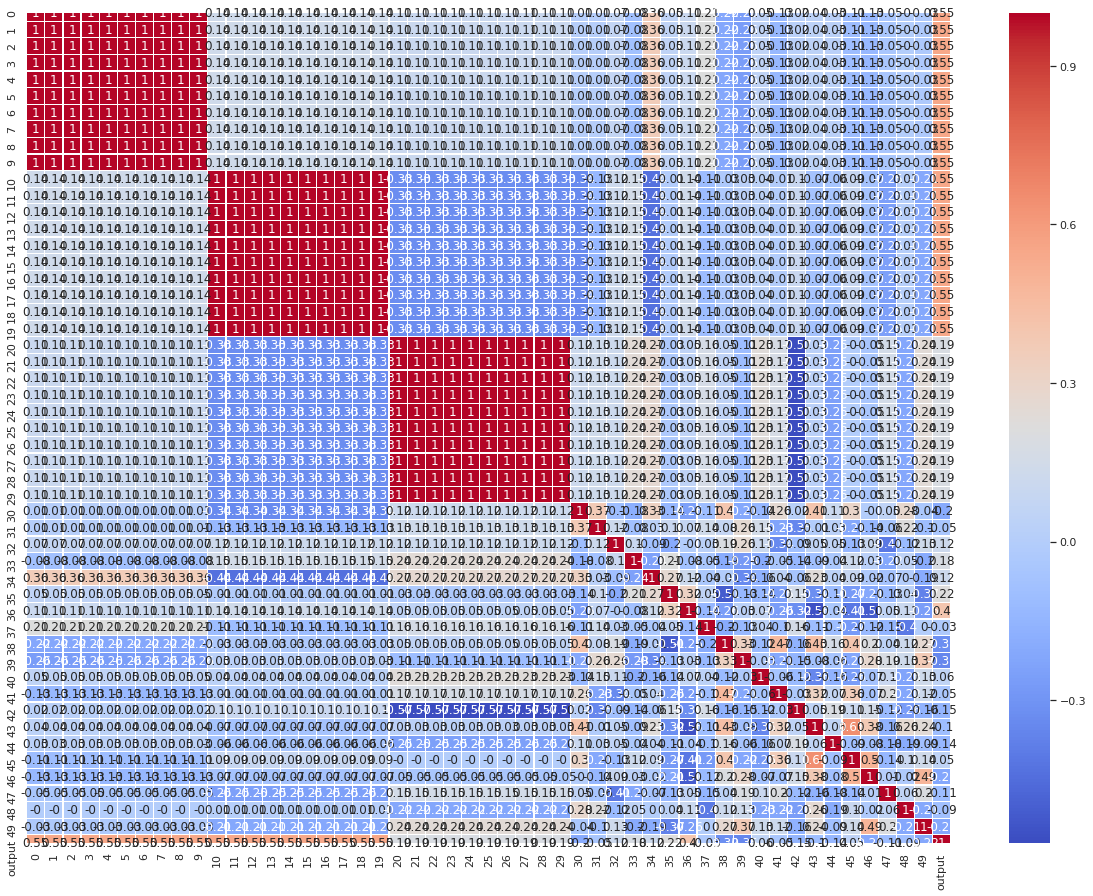

In [52]:
correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(20.7,15.27)})
ax = sns.heatmap(data=correlation_matrix, cmap='coolwarm', linewidths=.2, annot=True)

In [10]:
def alphal1ratio_to_taumu(alpha, l1_ratio):
    tau = alpha*l1_ratio
    mu = (tau - alpha) / 2
    
    return tau, mu

def taumu_to_alphal1ratio(tau, mu):
    alpha = 2*mu + tau
    l1_ratio = tau/alpha
    return alpha, l1_ratio

In [71]:
mu = 0
#taus = np.logspace(-1,-4,5)
taus = np.linspace(0.1,0.5,10)

alphas = []
l1_ratios = []

for tau in taus:
    alpha, l1_ratio = taumu_to_alphal1ratio(tau, mu)
    alphas.append(alpha)
    l1_ratios.append(l1_ratio)
    
#alphas = np.linspace(1,10,20)
#alphas = np.linspace(0.0001,0.9999,20)
#l1_ratios = np.linspace(0.0001,0.9999,20)

print(alphas)
print(l1_ratios)

tuned_parameters = [{'alpha': alphas, 'l1_ratio': l1_ratios}]

enet = ElasticNet(max_iter = 1000)

scores = []
coefs_found = []
best_params = []

K = 3
kf = StratifiedKFold(n_splits=K, shuffle=True)
kf.get_n_splits(X_data,y)
for train_index, test_index in kf.split(X_data, y):
    x_train, x_test = X_data[train_index], X_data[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = GridSearchCV(enet, tuned_parameters, cv=5)
    clf.fit(x_train, y_train)

    coefs = clf.best_estimator_.coef_
    params = clf.best_params_
    score = clf.score(x_test, y_test)

    print(coefs)
    #coefs_found += list(coefs)
    coefs_found.append(coefs)
    best_params.append(params) 
    scores.append(score)
    
max_score_index = np.where(scores == np.amax(scores))
print(max_score_index)
print("Best parameters after cross validation with u1")
print(best_params[max_score_index[0][0]])

print("Performace")
print(scores[max_score_index[0][0]])

cfs = np.asarray(coefs_found[max_score_index[0][0]])
numCoefs1 = np.array(cfs[cfs != 0])
print(numCoefs1.shape)

max_score_index

[0.1, 0.14444444444444446, 0.18888888888888888, 0.23333333333333334, 0.2777777777777778, 0.32222222222222224, 0.3666666666666667, 0.4111111111111111, 0.4555555555555556, 0.5]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.         -0.          0.          0.          0.
  0.5147158   0.         -0.27064057 -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.        ]
[ 5.97808001e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.03539982e-01  6.69522114e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00

/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(array([1]),)

In [72]:
params = best_params[max_score_index[0][0]]
alpha = params['alpha']
l1_ratio = params['l1_ratio']

tau, mu = alphal1ratio_to_taumu(alpha, l1_ratio)

mu

0.0

In [79]:
mu = 0.2
#taus = np.logspace(-1,-4,5)
taus = np.linspace(0.1,0.5,10)

alphas = []
l1_ratios = []

for tau in taus:
    alpha, l1_ratio = taumu_to_alphal1ratio(tau, mu)
    alphas.append(alpha)
    l1_ratios.append(l1_ratio)
    
#alphas = np.linspace(1,10,20)
#alphas = np.linspace(0.0001,0.9999,20)
#l1_ratios = np.linspace(0.0001,0.9999,20)

print(alphas)
print(l1_ratios)

tuned_parameters = [{'alpha': alphas, 'l1_ratio': l1_ratios}]

enet = ElasticNet(max_iter = 1000)

scores = []
coefs_found = []
best_params = []

K = 3
kf = StratifiedKFold(n_splits=K, shuffle=True)
kf.get_n_splits(X_data,y)
for train_index, test_index in kf.split(X_data, y):
    x_train, x_test = X_data[train_index], X_data[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = GridSearchCV(enet, tuned_parameters, cv=5)
    clf.fit(x_train, y_train)

    coefs = clf.best_estimator_.coef_
    params = clf.best_params_
    score = clf.score(x_test, y_test)

    print(coefs)
    #coefs_found += list(coefs)
    coefs_found.append(coefs)
    best_params.append(params) 
    scores.append(score)
    
max_score_index = np.where(scores == np.amax(scores))

print("Best parameters after cross validation with u1")
print(best_params[max_score_index[0][0]])

print("Performace")
print(scores[max_score_index[0][0]])

cfs = np.asarray(coefs_found[max_score_index[0][0]])
numCoefs1 = np.array(cfs[cfs != 0])
print(numCoefs1.shape)

max_score_index

[0.5, 0.5444444444444445, 0.5888888888888889, 0.6333333333333333, 0.6777777777777778, 0.7222222222222223, 0.7666666666666667, 0.8111111111111111, 0.8555555555555556, 0.9]
[0.2, 0.2653061224489796, 0.32075471698113206, 0.368421052631579, 0.4098360655737705, 0.4461538461538461, 0.4782608695652174, 0.5068493150684932, 0.5324675324675325, 0.5555555555555556]


/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.  0.
  0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0.  0. -0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.
  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0. -0.]
[ 0.0510346   0.05103477  0.05103474  0.05103456  0.05103432  0.0510341
  0.05103395  0.05103389  0.05103392  0.051034    0.05882792  0.0588278
  0.05882755  0.05882724  0.05882697  0.05882679  0.05882672  0.05882676
  0.05882688  0.05882704  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.         -0.         -0.          0.         -0.          0.
  0.          0.         -0.         -0.00798452 -0.          0.
 -0.         -0.         -0.          0.         -0.          0.
 -0.         -0.        ]
Best parameters after cr

/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(array([2]),)

In [80]:
def pearson_correlation(x, y):
    corr, _ = pearsonr(x, y)
    return corr

In [ ]:
corr = pairwise_kernels(minimal_dataset.values.T, maximal_dataset.values.T, metric=pearson_correlation)
print(corr.shape)